# Модель с работающим рынком

### TODO:
- Нормальная функция потребления для покупателей
- Нормальные правила прогноза производства для застройщиков
- Добавить съём жилья
- Добавить первоначальный взнос на ипотеку

### Требования к функции потребления:
- Убывающая полезность от количества
- Если больше одной комнаты на человека в семье - резко снижается полезность
- Если в семье ни одной комнаты, то все деньги должны идти на покупку хотя бы одной

In [1]:
import mesa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
from tqdm import tqdm
from warnings import filterwarnings

sys.path.insert(0, "../") # Для импорта custom_module

from custom_module.market_and_cycle_model.agents import Buyer, Seller, House
from custom_module.market_and_cycle_model.world import WorldModel

filterwarnings("ignore")

# Simulation

100%|██████████| 240/240 [00:40<00:00,  5.97it/s]


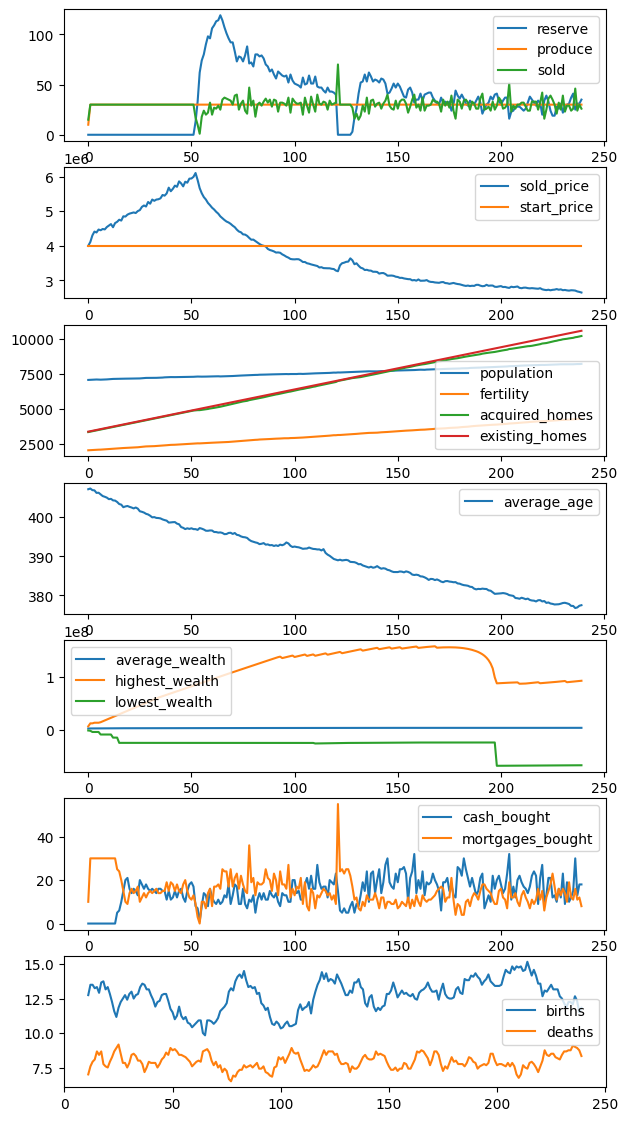

In [2]:
model = WorldModel(num_buyers=5000)
model.youth_mortgage_rate = model.mortgage_rate
model.family_mortgage_rate = model.mortgage_rate
for month in tqdm(range(240)):
    model.step()
    if month == 120:
        model.youth_mortgage_rate = 0.1
    #if month == 150:
    #    model.family_mortgage_rate = model.mortgage_rate
    #if month == 240:
    #    model.youth_mortgage_rate = 0.1
    #if month == 720:
    #    model.mortgage_rate = 0.15
    
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, figsize=(7,14))

ax1.plot(model.datacollector.get_model_vars_dataframe()[['alt_reserve', 'produce', 'sold']])
ax1.legend(['reserve', 'produce', 'sold'])

ax2.plot(model.datacollector.get_model_vars_dataframe()[['sold_price', 'start_price']])
ax2.legend(['sold_price', 'start_price'])

ax3.plot(model.datacollector.get_model_vars_dataframe()[['population', 'fertility', 'acquired_homes', 'existing_homes']])
ax3.legend(['population','fertility', 'acquired_homes', 'existing_homes']);

ax4.plot(model.datacollector.get_model_vars_dataframe()[['average_age']])
ax4.legend(['average_age']);

ax5.plot(model.datacollector.get_model_vars_dataframe()[['average_wealth', 'highest_wealth', 'lowest_wealth']])
ax5.legend(['average_wealth', 'highest_wealth', 'lowest_wealth']);

ax6.plot(model.datacollector.get_model_vars_dataframe()[['cash_bought', 'mortgages_bought']])
ax6.legend(['cash_bought', 'mortgages_bought']);

ax7.plot(model.datacollector.get_model_vars_dataframe()[['births', 'deaths']].rolling(12).mean())
ax7.legend(['births', 'deaths']);

(array([4.812e+03, 1.650e+02, 9.300e+01, 7.900e+01, 9.200e+01, 3.900e+01,
        3.000e+01, 2.600e+01, 4.200e+01, 1.100e+01, 1.300e+01, 9.000e+00,
        1.500e+01, 2.000e+00, 3.000e+00, 3.000e+00, 7.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1.        ,  2.24137931,  3.48275862,  4.72413793,  5.96551724,
         7.20689655,  8.44827586,  9.68965517, 10.93103448, 12.17241379,
        13.4137931 , 14.65517241, 15.89655172, 17.13793103, 18.37931034,
        19.62068966, 20.86206897, 22.10344828, 23.34482759, 24.5862069 ,
        25.82758621, 27.06896552, 28.31034483, 29.55172414, 30.79310345,
        32.03448276, 33.27586207, 34.51724138, 35.75862069, 37.        ]),
 <BarContainer object of 29 artists>)

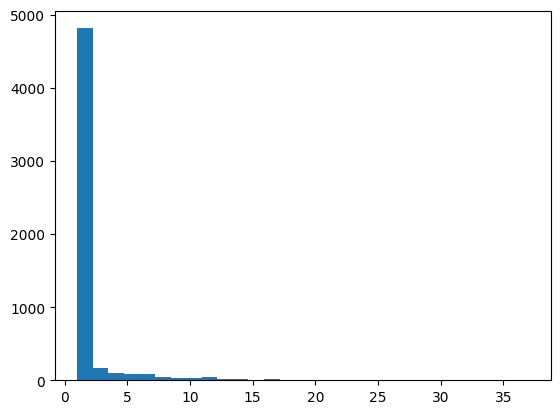

In [3]:
plt.hist([len(item.houses) for item in model.agents_by_type[Buyer].select(lambda x: x.age > 216)], bins=29)

In [4]:
buyers = model.agents_by_type[Buyer].select(lambda x: (len(x.houses) != 0) and (x.age > 216))
homeless =  model.agents_by_type[Buyer].select(lambda x: (len(x.houses) == 0) and (x.age > 216))
print(round(buyers.agg('wealth', np.mean)), round(homeless.agg('wealth', np.mean)))
print(round(buyers.agg('wealth', np.median)), round(homeless.agg('wealth', np.median)))
print(round(buyers.agg('wage', np.mean)), round(homeless.agg('wage', np.mean)))
print(round(buyers.agg('wage', np.median)), round(homeless.agg('wage', np.median)))
print(round(buyers.agg('age', np.mean)), round(homeless.agg('age', np.mean)))
print(round(buyers.agg('age', np.median)), round(homeless.agg('age', np.median)))

ValueError: cannot convert float NaN to integer

In [ ]:
len(homeless)

1141